In [1]:
import requests

In [2]:
data_set_id = "10100139"
r = requests.get("https://www150.statcan.gc.ca/t1/wds/rest/getFullTableDownloadCSV/{}/en".format(data_set_id))

In [3]:
r.status_code

200

In [4]:
print(r.url)

https://www150.statcan.gc.ca/t1/wds/rest/getFullTableDownloadCSV/10100139/en


In [5]:
r.headers

{'Date': 'Sat, 11 May 2019 23:33:08 GMT', 'Content-Type': 'application/json', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Expires': 'Sat, 11 May 2019 23:35:08 GMT', 'Cache-Control': 'max-age=120, public', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'Content-Security-Policy': "default-src 'self' 'unsafe-inline' *.statcan.gc.ca *.statcan.ca *.demdex.net *.omtrdc.net *.everesttech.net blob:; style-src 'self' 'unsafe-inline' *.statcan.gc.ca blob:; script-src 'self' 'unsafe-inline' 'unsafe-eval' *.statcan.gc.ca *.googletagmanager.com *.adobedtm.com *.jsdelivr.net *.mathjax.org cdnjs.cloudflare.com blob:; connect-src 'self' *.statcan.gc.ca *.demdex.net *.omtrdc.net; img-src 'self' *.statcan.gc.ca *.demdex.net *.omtrdc.net *.everesttech.net *.jsdelivr.net data:; font-src 'self' *.statcan.gc.ca; worker-src 'self' 'unsafe-inline' 'unsafe-eval' *.statcan.gc.ca blob:;", 'X-Frame-Options': 'SAMEORIGIN, SAMEORIGIN', 'Strict-Transport-Security': 'max-age=315

In [6]:
r.text

'{"status":"SUCCESS","object":"https://www150.statcan.gc.ca/n1/tbl/csv/10100139-eng.zip"}'

In [7]:
print()

In [8]:
%load_ext autoreload
%autoreload 2

%run relativepath.py
%run commonimports.py
%run displayoptions.py
%matplotlib inline

2019-05-11 19:33:09,479 Property "cache_dir" set to data


In [9]:
def getCanZips(datasets):
    dataset_list = list()
    for set_id in datasets:
        r = requests.get("https://www150.statcan.gc.ca/t1/wds/rest/getFullTableDownloadCSV/{}/en".format(set_id))
        dataset = StatscanZip(r.json()['object'])
        dataset_list.append(dataset)
    if (len(dataset_list) < 2):
        return dataset_list[0]
    else:
        return dataset_list

In [10]:
student_employment = "14100021"
retail_ecommerce = "20100072"
electric_power = "25100015"
correctional_services = getCanZips(["35100003"])
canZips = getCanZips([retail_ecommerce,electric_power])

In [11]:
canZips

[<StatscanZip: https://www150.statcan.gc.ca/n1/tbl/csv/20100072-eng.zip>,
 <StatscanZip: https://www150.statcan.gc.ca/n1/tbl/csv/25100015-eng.zip>]

In [12]:
retail_ecommerce_data = canZips[0].get_data()

2019-05-11 19:33:10,648 Reading file data/20100072.csv


In [13]:
retail_ecommerce_data.shape

(38, 5)

In [14]:
retail_ecommerce_data.columns

Index(['REF_DATE', 'GEO', 'Electronic shopping and mail-order houses',
       'Retail E-commerce sales', 'Retail trade'],
      dtype='object')

In [15]:
retail_ecommerce_data = retail_ecommerce_data.set_index("REF_DATE")

Text(0, 0.5, '%')

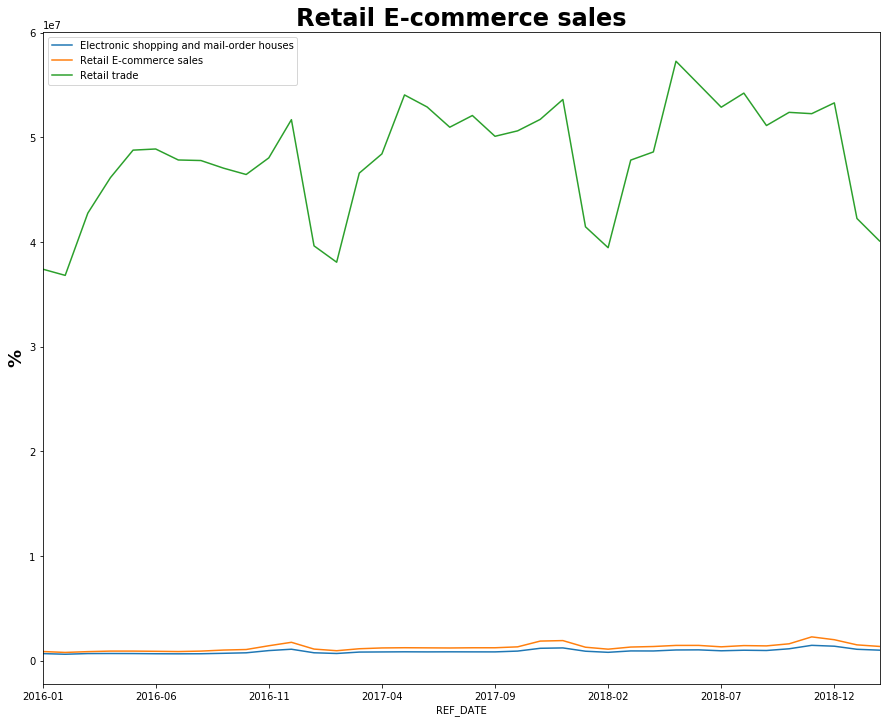

In [16]:
ax = retail_ecommerce_data.plot(figsize=(15,12),kind="line")
ax.set_title('Retail E-commerce sales', fontsize=24, fontweight='bold')
ax.set_ylabel('%', fontsize=18, fontweight='bold')

In [17]:
electric_power_data = canZips[1].get_data()

2019-05-11 19:33:11,967 Reading file data/25100015.csv


In [18]:
electric_power_data.shape

(5532, 14)

In [19]:
electric_power_data.columns

Index(['REF_DATE', 'GEO', 'Class of electricity producer',
       'Combustion turbine', 'Conventional steam turbine', 'Hydraulic turbine',
       'Internal combustion turbine', 'Nuclear steam turbine',
       'Other types of electricity generation', 'Solar', 'Tidal power turbine',
       'Total all types of electricity generation',
       'Total electricity production from combustible fuels',
       'Wind power turbine'],
      dtype='object')

In [20]:
electric_power_data = electric_power_data.set_index("REF_DATE")

In [21]:
electric_power_data

,GEO,Class of electricity producer,Combustion turbine,Conventional steam turbine,Hydraulic turbine,Internal combustion turbine,Nuclear steam turbine,Other types of electricity generation,Solar,Tidal power turbine,Total all types of electricity generation,Total electricity production from combustible fuels,Wind power turbine
REF_DATE,,,,,,,,,,,,,
2008-01,Canada,Total all classes of electricity producer,2154775.0,11021441.0,36647695.0,105643.0,8963878.0,NaN,NaN,2417.0,59082501.0,NaN,186652.0
2008-01,Canada,"Electricity producers, electric utilities",1850300.0,10182776.0,33936457.0,79403.0,8963878.0,NaN,NaN,2417.0,55201883.0,NaN,186652.0
2008-01,Canada,"Electricity producers, industries",304475.0,838665.0,2711238.0,26240.0,NaN,NaN,NaN,NaN,3880618.0,NaN,NaN
2008-01,Newfoundland and Labrador,Total all classes of electricity producer,24744.0,201394.0,4623932.0,10025.0,NaN,NaN,NaN,NaN,4860095.0,NaN,NaN
2008-01,Newfoundland and Labrador,"Electricity producers, electric utilities",910.0,201394.0,4565355.0,10025.0,NaN,NaN,NaN,NaN,4777684.0,NaN,NaN
2008-01,Newfoundland and Labrador,"Electricity producers, industries",23834.0,0.0,58577.0,0.0,NaN,NaN,NaN,NaN,82411.0,NaN,NaN
2008-01,Prince Edward Island,Total all classes of electricity producer,-56.0,20.0,NaN,2.0,NaN,NaN,NaN,NaN,11321.0,NaN,11355.0
2008-01,Prince Edward Island,"Electricity producers, electric utilities",-56.0,20.0,NaN,2.0,NaN,NaN,NaN,NaN,11321.0,NaN,11355.0
2008-01,Nova Scotia,Total all classes of electricity producer,30863.0,1036750.0,107413.0,NaN,NaN,NaN,NaN,2417.0,1189005.0,NaN,11562.0


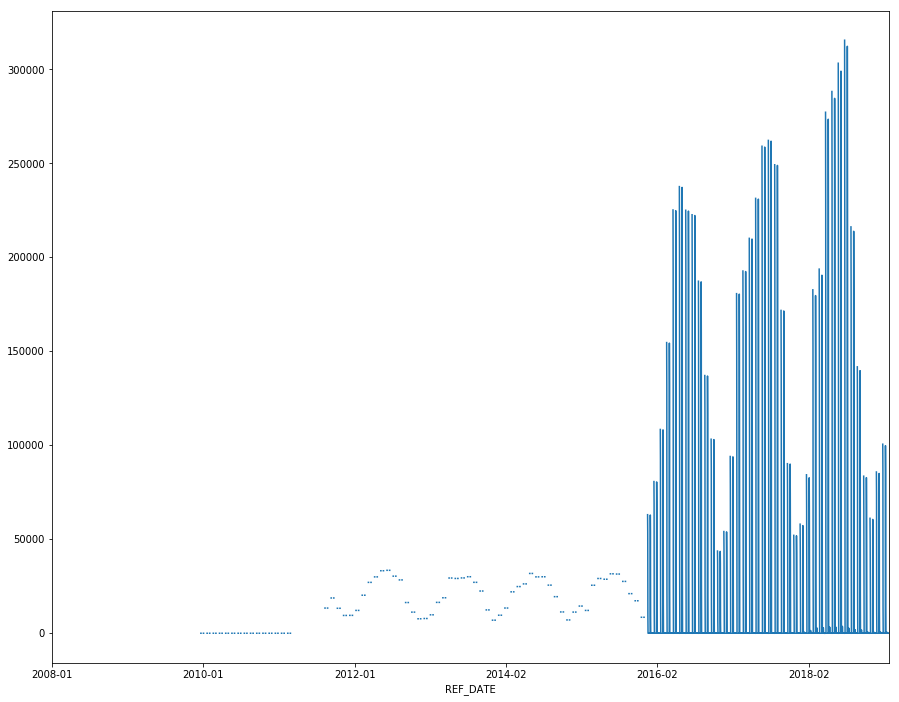

In [22]:
electric_power_data['Solar'].plot(figsize=(15,12))

In [23]:
electric_power_data = electric_power_data.interpolate('ffill')

In [24]:
electric_power_data

,GEO,Class of electricity producer,Combustion turbine,Conventional steam turbine,Hydraulic turbine,Internal combustion turbine,Nuclear steam turbine,Other types of electricity generation,Solar,Tidal power turbine,Total all types of electricity generation,Total electricity production from combustible fuels,Wind power turbine
REF_DATE,,,,,,,,,,,,,
2008-01,Canada,Total all classes of electricity producer,2154775.0,11021441.0,36647695.0,105643.0,8963878.0,8963878.0,8963878.0,2417.0,59082501.0,59082501.0,186652.0
2008-01,Canada,"Electricity producers, electric utilities",1850300.0,10182776.0,33936457.0,79403.0,8963878.0,8963878.0,8963878.0,2417.0,55201883.0,55201883.0,186652.0
2008-01,Canada,"Electricity producers, industries",304475.0,838665.0,2711238.0,26240.0,26240.0,26240.0,26240.0,26240.0,3880618.0,3880618.0,3880618.0
2008-01,Newfoundland and Labrador,Total all classes of electricity producer,24744.0,201394.0,4623932.0,10025.0,10025.0,10025.0,10025.0,10025.0,4860095.0,4860095.0,4860095.0
2008-01,Newfoundland and Labrador,"Electricity producers, electric utilities",910.0,201394.0,4565355.0,10025.0,10025.0,10025.0,10025.0,10025.0,4777684.0,4777684.0,4777684.0
2008-01,Newfoundland and Labrador,"Electricity producers, industries",23834.0,0.0,58577.0,0.0,0.0,0.0,0.0,0.0,82411.0,82411.0,82411.0
2008-01,Prince Edward Island,Total all classes of electricity producer,-56.0,20.0,20.0,2.0,2.0,2.0,2.0,2.0,11321.0,11321.0,11355.0
2008-01,Prince Edward Island,"Electricity producers, electric utilities",-56.0,20.0,20.0,2.0,2.0,2.0,2.0,2.0,11321.0,11321.0,11355.0
2008-01,Nova Scotia,Total all classes of electricity producer,30863.0,1036750.0,107413.0,107413.0,107413.0,107413.0,107413.0,2417.0,1189005.0,1189005.0,11562.0


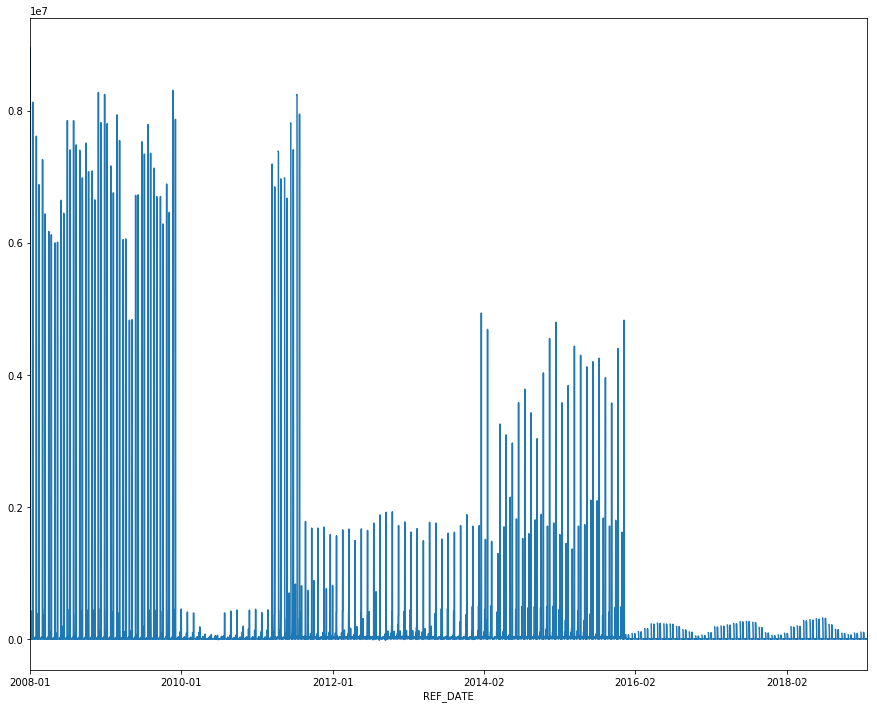

In [25]:
electric_power_data['Solar'].plot(figsize=(15,12))

In [26]:
correctional_services_data = correctional_services.get_data()

2019-05-11 19:33:13,635 Reading file data/35100003.csv


In [27]:
correctional_services_data.columns

Index(['REF_DATE', 'GEO',
       'Community portion of custody sentence, community supervision',
       'Deferred custody, community supervision',
       'Incarceration rates per 10,000 young persons',
       'Intensive support and supervision, community supervision',
       'Pre-trial detention and other temporary detention, actual-in count',
       'Probation rate per 10,000 young persons',
       'Probation, community supervision',
       'Sentenced open custody, actual-in count',
       'Sentenced secure custody, actual-in count', 'Total actual-in count',
       'Total community supervision count',
       'Total sentenced custody, actual-in count'],
      dtype='object')

In [28]:
correctional_services_data

,REF_DATE,GEO,"Community portion of custody sentence, community supervision","Deferred custody, community supervision","Incarceration rates per 10,000 young persons","Intensive support and supervision, community supervision","Pre-trial detention and other temporary detention, actual-in count","Probation rate per 10,000 young persons","Probation, community supervision","Sentenced open custody, actual-in count","Sentenced secure custody, actual-in count",Total actual-in count,Total community supervision count,"Total sentenced custody, actual-in count"
0,1997/1998,Provinces and Territories,NaN,NaN,20.22,NaN,1111.7,165.90,40397.0,2050.0,1775.4,4937.1,40397.0,3825.4
1,1997/1998,Newfoundland and Labrador,NaN,NaN,23.99,NaN,15.1,225.97,1168.6,55.7,53.3,124.1,1168.6,109.0
2,1997/1998,Prince Edward Island,NaN,NaN,23.04,NaN,2.1,248.91,301.8,12.9,13.0,27.9,301.8,25.8
3,1997/1998,Nova Scotia,NaN,NaN,19.48,NaN,24.3,188.60,1423.3,95.7,27.1,147.0,1423.3,122.7
4,1997/1998,New Brunswick,NaN,NaN,25.56,NaN,15.8,187.05,1175.1,79.4,65.3,160.6,1175.1,144.8
5,1997/1998,Quebec,NaN,NaN,9.63,NaN,107.0,85.00,4883.0,213.6,232.5,553.1,4883.0,446.1
6,1997/1998,Ontario,NaN,NaN,NaN,NaN,267.7,224.43,20035.8,948.2,804.6,2020.5,20035.8,1752.8
7,1997/1998,Manitoba,NaN,NaN,32.50,NaN,101.7,197.52,1913.1,116.9,96.2,314.8,1913.1,213.1
8,1997/1998,Saskatchewan,NaN,NaN,39.60,NaN,69.5,194.48,1878.9,140.3,172.7,382.6,1878.9,313.1
9,1997/1998,Alberta,NaN,NaN,18.94,NaN,136.9,127.22,3226.0,176.9,166.5,480.3,3226.0,343.4


In [29]:
y1 = correctional_services_data.apply(lambda row : row if row['GEO'] == 'Ontario' else float('nan'), axis=1)

In [30]:
ontario_data = correctional_services_data[correctional_services_data['GEO'] == 'Ontario']

In [31]:
ontario_data = ontario_data.reset_index(drop=True)

In [32]:
x = ontario_data.index
y1 = ontario_data['Total sentenced custody, actual-in count']
y2 = ontario_data['Sentenced secure custody, actual-in count']
y3 = ontario_data['Sentenced open custody, actual-in count']

In [33]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

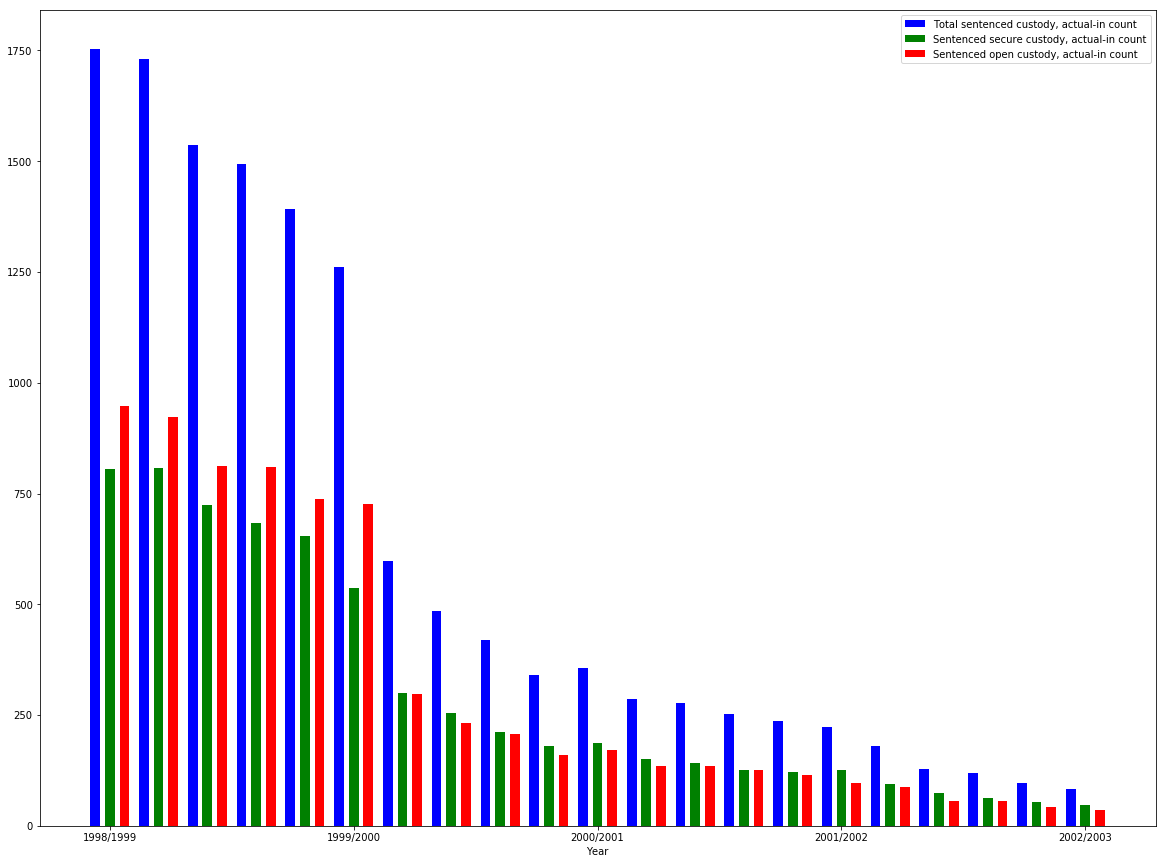

In [48]:
figure(figsize=(20, 15))
ax = plt.subplot()

ax.bar(x-0.3,y1, width=0.2, color='b', align='center', label='Total sentenced custody, actual-in count')
ax.bar(x,y2, width=0.2, color='g', align='center', label='Sentenced secure custody, actual-in count')
ax.bar(x+0.3,y3, width=0.2, color='r', align='center', label='Sentenced open custody, actual-in count')
ax.set_xlabel('Year')
ax.set_xticklabels(ontario_data['REF_DATE'])
ax.legend()